In [2]:
%cd ..

/home/elias/work/generative-scattering-networks


In [33]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from kymatio import Scattering2D
from PIL import Image
from torchvision.transforms import ToTensor, Resize, Compose

In [19]:
im = Image.open("/home/elias/datasets/celeba_hq/1024_rgb/train/0.jpg")
print(im)

transform = Compose([
    Resize((128, 128)),
    ToTensor(),
])

x = transform(im)
print(x.shape)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7F50BBD903C8>
torch.Size([3, 128, 128])


In [20]:
scattering = Scattering2D(J=4, shape=(128, 128))

In [21]:
Sx = scattering(x)
print(Sx.shape)

torch.Size([3, 417, 8, 8])


In [24]:
X = Sx.view(-1, 8, 8)
print(X.shape)

torch.Size([1251, 8, 8])


<IPython.core.display.Javascript object>


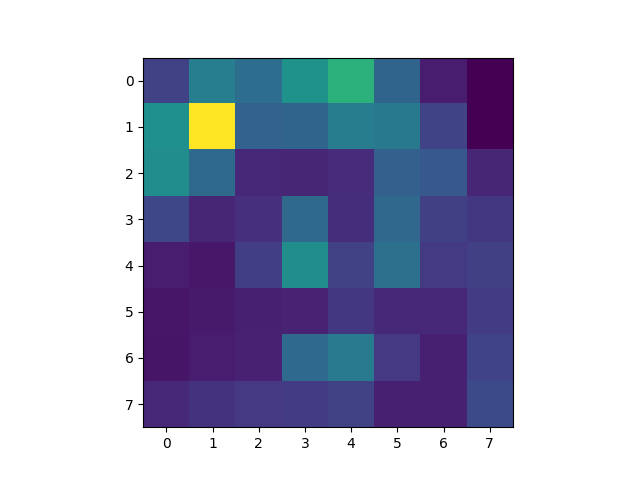

[]

In [31]:
plt.figure()
plt.imshow(X[5,:,:].reshape(8, 8))
plt.plot()